Minimization of the 2D function
$$f(\mathbf{x}) = \frac{1}{2}(x_1^2 + \eta x_2^2)$$
where $\mathbf{x} = (x_1, x_2)$ and $\eta > 0$

- 1: plot the conourlines of the function for differenct values of $\eta$

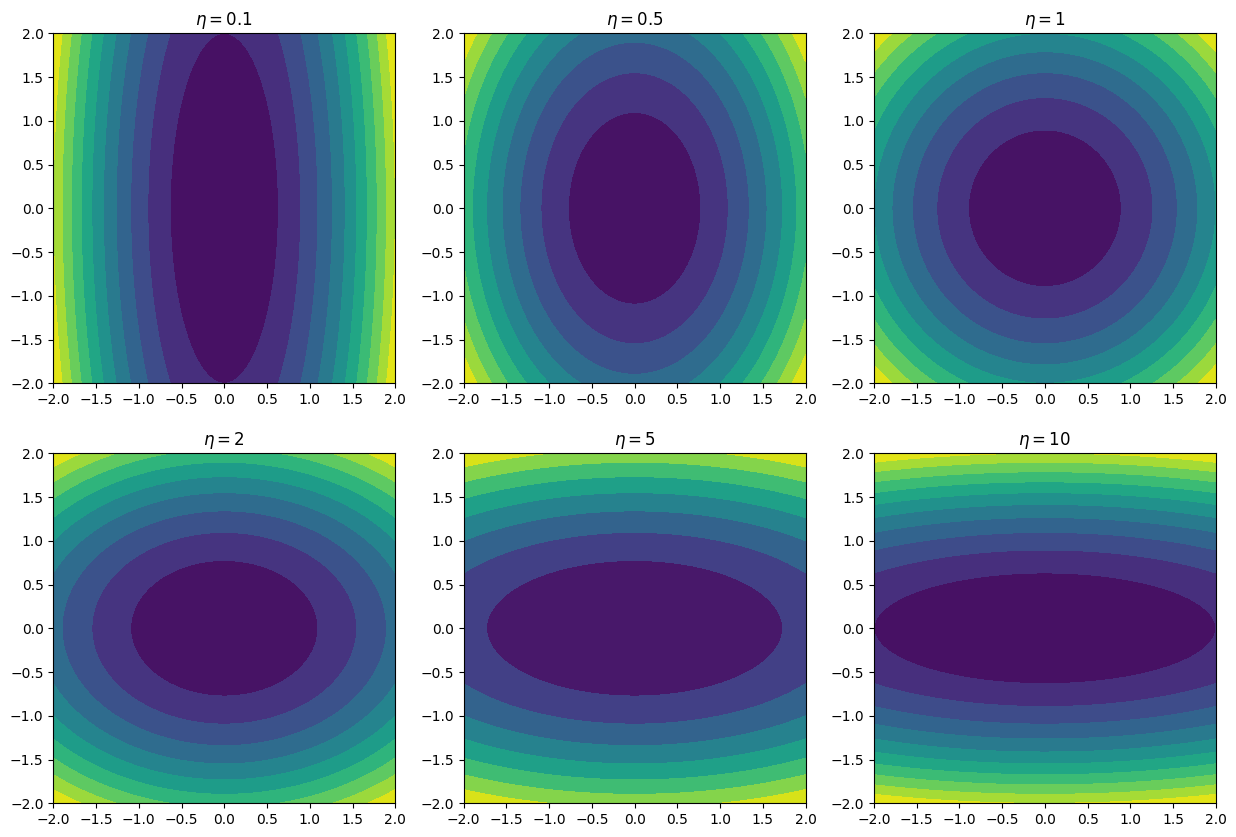

In [37]:
import numpy as np
import matplotlib.pyplot as plt

etas = [0.1, 0.5, 1, 2, 5, 10]
fix, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
[X, Y] = np.meshgrid(x, y)

i = 0
for eta in etas:
    Z = (X**2 + eta * Y**2) / 2

    axs[i].contourf(X, Y, Z, 10)
    axs[i].set_title(f"$\eta = {eta}$")
    i += 1

- 2: How does $\eta$ impact on the numerical solution of the problem?

    The value of $\eta$ will have an impact when computing the gradient of the function. The gradient is given by
    $$\nabla f(\mathbf{x}) = \begin{pmatrix} x_1 \\ \eta x_2 \end{pmatrix}$$
    This means that by applying the gradient descent algorithm we will have a different direction as $\eta$ changes. This will impact on the number of iterations needed to reach the minimum of the function.

- 3: Let's use the gradient descent method.
    $$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \tau_k \nabla f(\mathbf{x}^{(k)})$$
    with $\tau_k > 0$ the step size.

    In the convex case, and if $f$ is of class $\mathcal{C}^2$ to have convergence we must have:
    $$0 < \alpha_k < \frac{2}{\lambda_{\max}(\nabla^2 f(\mathbf{x}^{(k)}))}$$
    where $\lambda_{\max}(\nabla^2 f(\mathbf{x}^{(k)}))$ is the largest eigenvalue of the Hessian matrix of $f$ at $\mathbf{x}^{(k)}$.

    Compute the maximum value of $\tau_k$ to have convergence (hence $\frac{2}{\lambda_{\max}(\nabla^2 f(\mathbf{x}^{(k)}))}$).



The Hessian have the following form:
$$\nabla^2 f(\mathbf{x}) = \begin{pmatrix} 1 & 0 \\ 0 & \eta \end{pmatrix}$$
which means that the eigenvalues are $\lambda_1 = 1$ and $\lambda_2 = \eta$, and that $\lambda_{\max}(\nabla^2 f(\mathbf{x}^{(k)})) = \max(1, \eta)$.

Hence, the maximum value of $\tau_k$ to have convergence is $\tau_k < \frac{2}{\max(1, \eta)}$.

- 4: Implement the GD method with constant step size $\tau_k = \tau$. Assume that $\eta = 4$ and $\mathbf{x}^{(0)} = (0.9,0.3)$.

    Display the iterations on the contour plot of the function for different values of the step size. Comment the results.

Since $\eta = 4$, the maximum value of $\tau_k$ to have convergence is $\tau_k < \frac{2}{\max(1,4)} = \frac{2}{4} = \frac{1}{2}$.

Let's check this with the code.

number of epochs for tau = 0.10: 101
Last point for tau = 0.10: [2.39052590e-05 1.95995587e-23]
number of epochs for tau = 0.40: 28
Last point for tau = 0.40: [ 9.21141332e-07 -3.07047111e-07]
number of epochs for tau = 0.49: 101
Last point for tau = 0.49: [5.14351629e-30 5.06109581e-03]
number of epochs for tau = 0.50: 101
Last point for tau = 0.50: [7.09974815e-31 3.00000000e-01]
number of epochs for tau = 1.00: 101
Last point for tau = 1.00: [0.00000000e+00 1.54613256e+47]
number of epochs for tau = 5.00: 101
Last point for tau = 5.00: [1.44624424e+060 2.25154873e+127]


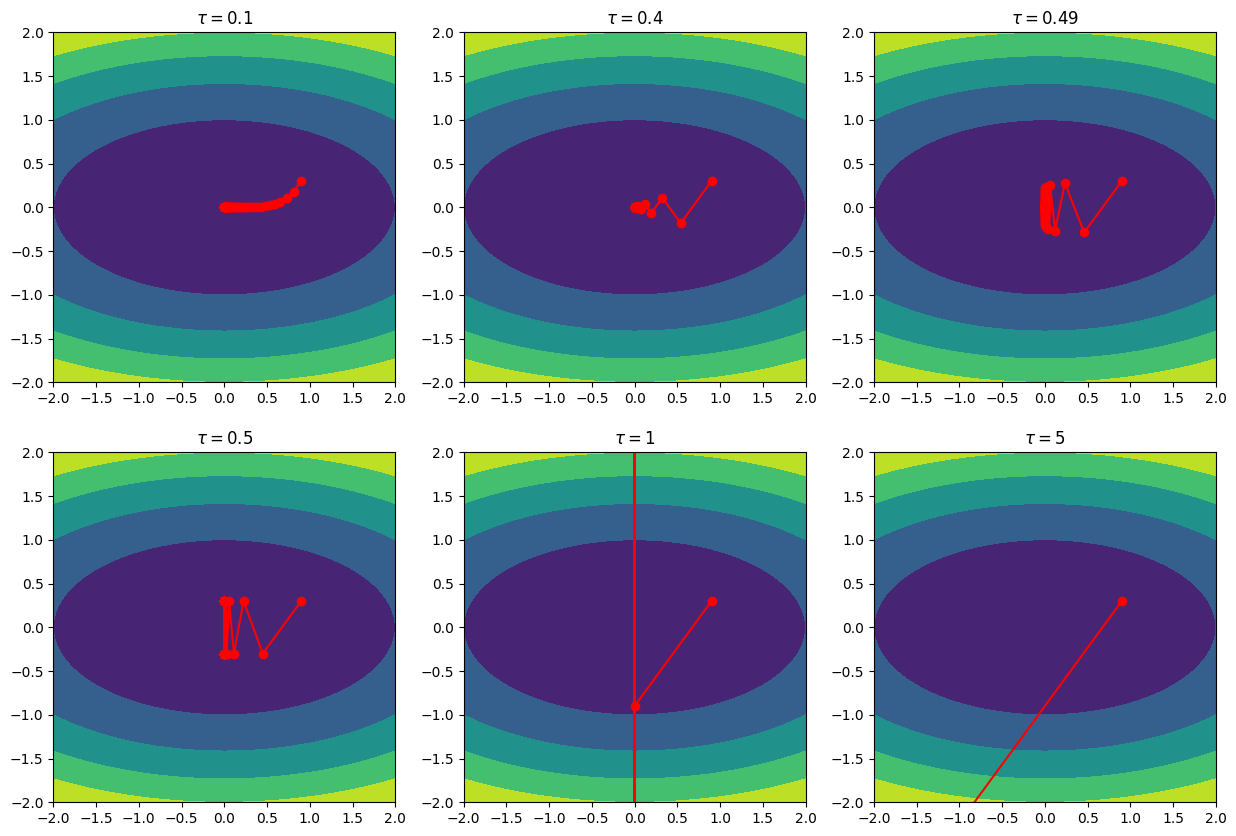

In [61]:
eta = 4
gradient = lambda x: np.array([x[0], eta * x[1]])

fix, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
[X, Y] = np.meshgrid(x, y)
Z = (X**2 + eta * Y**2) / 2

initial_guess = np.array([0.9, 0.3])
exact_solution = np.array([0, 0])
tol = 1e-6
n_epochs = 100

optimal_tau = 2 / (1 + eta)
taus = [0.1, 0.4, 0.49, 0.5, 1, 5]
i = 0
for tau in taus:
    xk = initial_guess.copy()
    conv_history = []
    conv_history.append(xk.copy())
    for epoch in range(n_epochs):
        xk -= tau * gradient(xk)
        conv_history.append(xk.copy())
        if np.linalg.norm(xk - exact_solution) < tol:
            break

    conv_history = np.array(conv_history).T
    print("number of epochs for tau = %1.2f:" % tau, len(conv_history[0]))
    print("Last point for tau = %1.2f:" % tau, conv_history[:, -1])

    axs[i].contourf(X, Y, Z, 5)
    axs[i].set_title(f"$\\tau = {tau}$")
    axs[i].plot(
        conv_history[0],
        conv_history[1],
        color="red",
        marker="o",
    )
    axs[i].set_xlim([-2, 2])
    axs[i].set_ylim([-2, 2])
    i += 1

- 5: Consider the exact line search method for the dynamic choice of the step size.

    In this method, at each step we choose 
    $$\tau_k = \argmin_s{f(x^{(k)} - s\nabla f(x^{(k)}))}$$

See [here](e2.pdf) for the computation of the explicit expression of $\tau_k$.

- 6: Implement the GD method with variable step size using the optimal learning rate and apply the method to the function. Display the iterations on the contour plot of the function. Comment the results.

Number of iterations: 25
Last point: [ 5.78127821e-07 -4.33595866e-07]


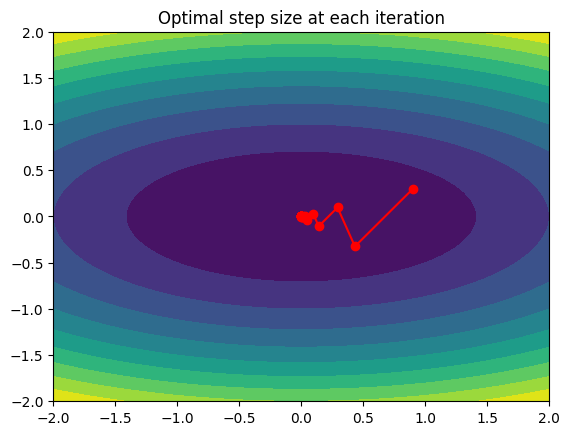

In [62]:
eta = 4
gradient = lambda x: np.array([x[0], eta * x[1]])

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
[X, Y] = np.meshgrid(x, y)
Z = (X**2 + eta * Y**2) / 2

initial_guess = np.array([0.9, 0.3])
exact_solution = np.array([0, 0])

tol = 1e-6
n_epochs = 100

conv_history = [initial_guess.copy()]
xk = initial_guess.copy()
for epoch in range(n_epochs):
    tau_k = (xk[0] ** 2 + eta * xk[1] ** 2) / (xk[0] ** 2 + eta**2 * xk[1] ** 2)
    xk -= tau_k * gradient(xk)
    conv_history.append(xk.copy())
    if np.linalg.norm(xk - exact_solution) < tol:
        break

print("Number of iterations:", epoch + 1)

conv_history = np.array(conv_history).T
print("Last point:", conv_history[:, -1])

plt.contourf(X, Y, Z, 10)
plt.title("Optimal step size at each iteration")
plt.plot(
    conv_history[0],
    conv_history[1],
    color="red",
    marker="o",
)